In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import defaultdict
import os
from tqdm import tqdm
from scipy.stats import entropy
%matplotlib inline

In [2]:
iso2name = {'arb':"Arabic", 'cmn':"Chinese",  'jpn':"Japanese", 'deu':"German", 'tur':"Turkish",
 'guj':"Gujarati", 'heb':"Hebrew",  'hin':"Hindi", 'pan':"Punjabi", 'kaz':"Kazakh", 'mon':"Mongolian", 'urd':"Urdu", 'amh':"Amharic",
           "hun":"Hungarian", "kor":"Korean", "mhr":"Meadow Mari", "mlt":"Maltese", "sin":"Sinhala", "ydd":"Yiddish", "fin":"Finnish" }

In [3]:
# mt5
lang2percent = {'zho': 1.67, 'ara': 1.66, 'eng': 5.67, 'mar': 0.93, 'rus': 3.71, 'tur': 1.93, 'ben': 0.91, 'fas': 1.67,
                'deu': 3.05, 'jpn': 1.92,
                'pol': 2.15, 'spa': 3.09, 'fra': 2.89, 'swe': 1.61, 'kor': 1.14, 'ces': 1.72, 'bul': 1.29, 'ita': 2.43,
                'slk': 1.19, 'aze': 0.82,
                'ukr': 1.51, 'fin': 1.35, 'nld': 1.98, 'tgl': 0.52, 'mkd': 0.62, 'epo': 0.4,
                "pan": 0.37, "sin": 0.41, "guj": 0.43, "urd": 0.61, "ydd": 0.28, "mon": 0.62,
                "amh": 0.29, "kaz": 0.65,"arb": 1.66, "heb": 1.06, "cmn": 1.67, "mlt": 0.64, "hun": 1.48,
                 "mhr": 0,  # eastern mari.
                "hin": 1.21}

# Language Confusion with Inversion at Eval data

In [4]:
# results/inversion_language_confusion
# re-weighted entropy, inversion_avg, mt5

df_line_cross = pd.read_csv("../results/inversion_language_confusion/line_level/dataframes/multi_line_crosslingual_weighted_entropy_bleu_score_for_eval.csv", index_col=0)
df_line_mono = pd.read_csv("../results/inversion_language_confusion/line_level/dataframes/multi_line_monolingual_weighted_entropy_bleu_score_for_eval.csv", index_col=0)
df_word_cross = pd.read_csv("../results/inversion_language_confusion/word_level/dataframes/multi_word_crosslingual_weighted_entropy_bleu_score_for_eval.csv", index_col=0)
df_word_mono = pd.read_csv("../results/inversion_language_confusion/word_level/dataframes/multi_word_monolingual_weighted_entropy_bleu_score_for_eval.csv", index_col=0)

In [5]:
df_line_mono.rename(columns={"entropy":"line_mono_reweighted-entropy"}, inplace=True)
df_line_cross.rename(columns={"entropy":"line_cross_reweighted-entropy"}, inplace=True)
df_word_mono.rename(columns={"entropy":"word_mono_reweighted-entropy"}, inplace=True)
df_word_cross.rename(columns={"entropy":"word_cross_reweighted-entropy"}, inplace=True)

In [6]:
df_line_mono.head(2)

,lang,step,line_mono_reweighted-entropy,language,inversion_avg,mt5
0,cmn,Base,0.0,Chinese,6.461958,1.67
1,deu,Base,0.0,German,6.367758,3.05


In [7]:
df_cross = df_word_cross.merge(df_line_cross, on=["language", "step", "lang", "inversion_avg", "mt5"])
df_mono = df_word_mono.merge(df_line_mono, on=["language", "step", "lang", "inversion_avg", "mt5"])
df = df_mono.merge(df_cross, on=["language", "step", "lang", "inversion_avg", "mt5"], how="outer")

In [8]:
groups =[]
for k, group in df.groupby("lang"):
    groups.append(group)

In [9]:
df_group= pd.concat(groups)

In [169]:
df_group.to_csv("../results/inversion_language_confusion/language_confusion_inversion_eval.csv", index=False)

In [10]:
df.head(3)

,lang,step,word_mono_reweighted-entropy,language,inversion_avg,mt5,line_mono_reweighted-entropy,word_cross_reweighted-entropy,line_cross_reweighted-entropy
0,amh,Base,NaN,Amharic,7.261268,0.29,NaN,1.990603,1.294869
1,amh,Step1,NaN,Amharic,6.739298,0.29,NaN,1.798308,1.142023
2,amh,Step50+sbeam8,NaN,Amharic,6.514071,0.29,NaN,1.895785,1.254834


# Plot

In [15]:
df_cross.head(2)

,lang,step,word_cross_reweighted-entropy,language,inversion_avg,mt5,line_cross_reweighted-entropy
0,sin,Base,1.666836,Sinhala,6.614690,0.41,0.906096
1,guj,Base,1.762852,Gujarati,8.875215,0.43,0.937231


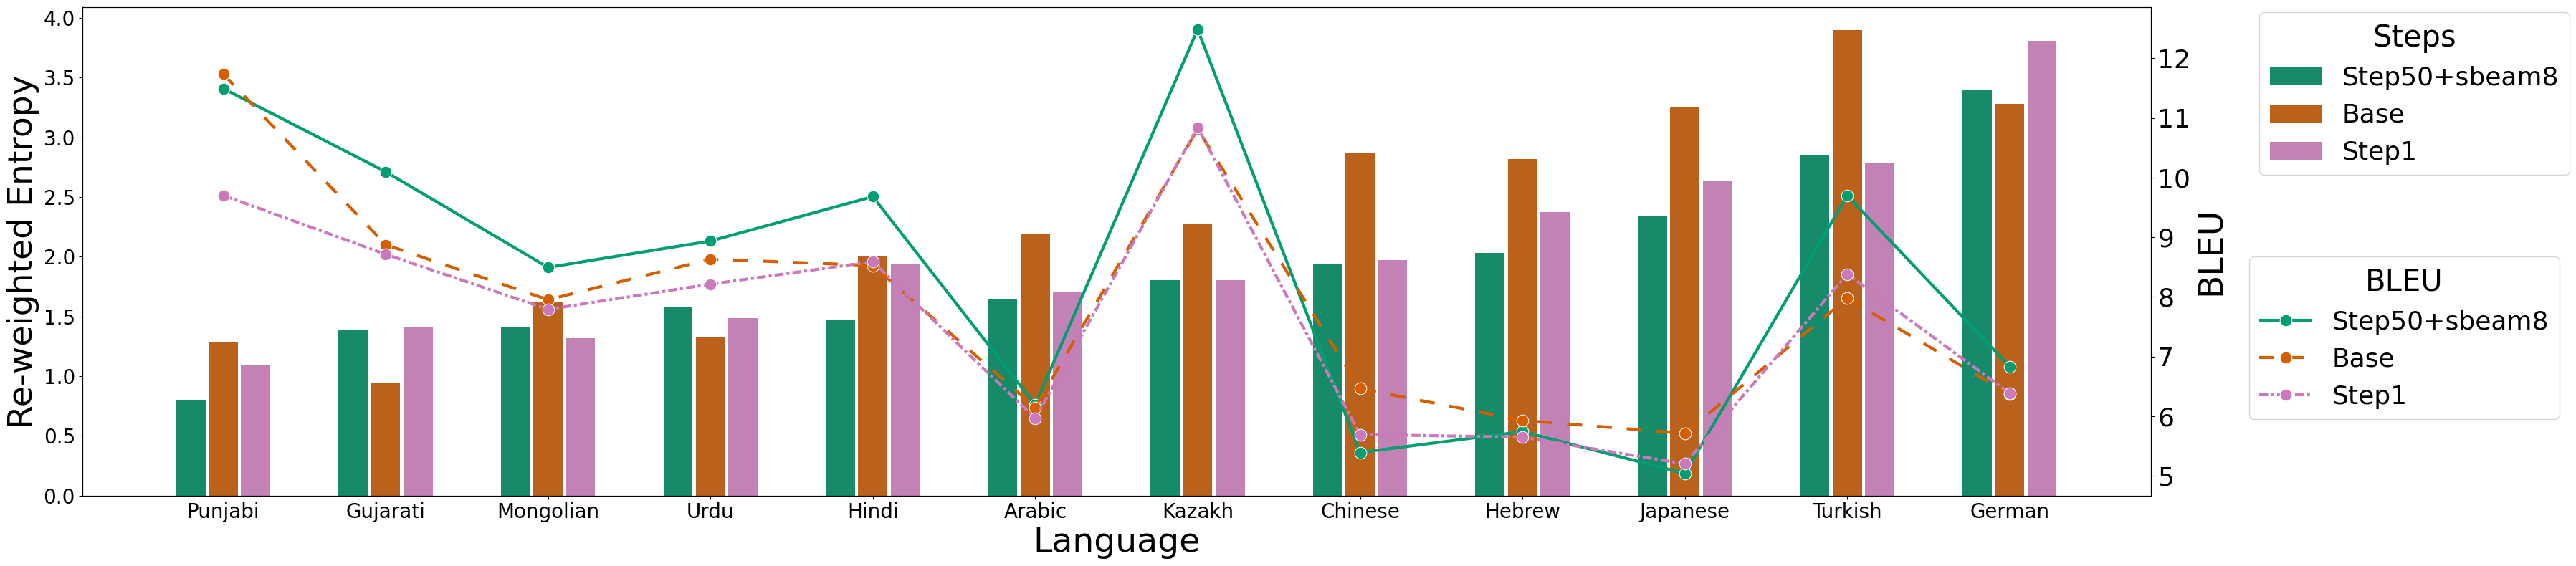

In [142]:
plot_lc_inversion(df.dropna().sort_values(by="line_cross_reweighted-entropy"), "line_cross_reweighted-entropy", "test.pdf", "eval", metric_name="BLEU", level="line")

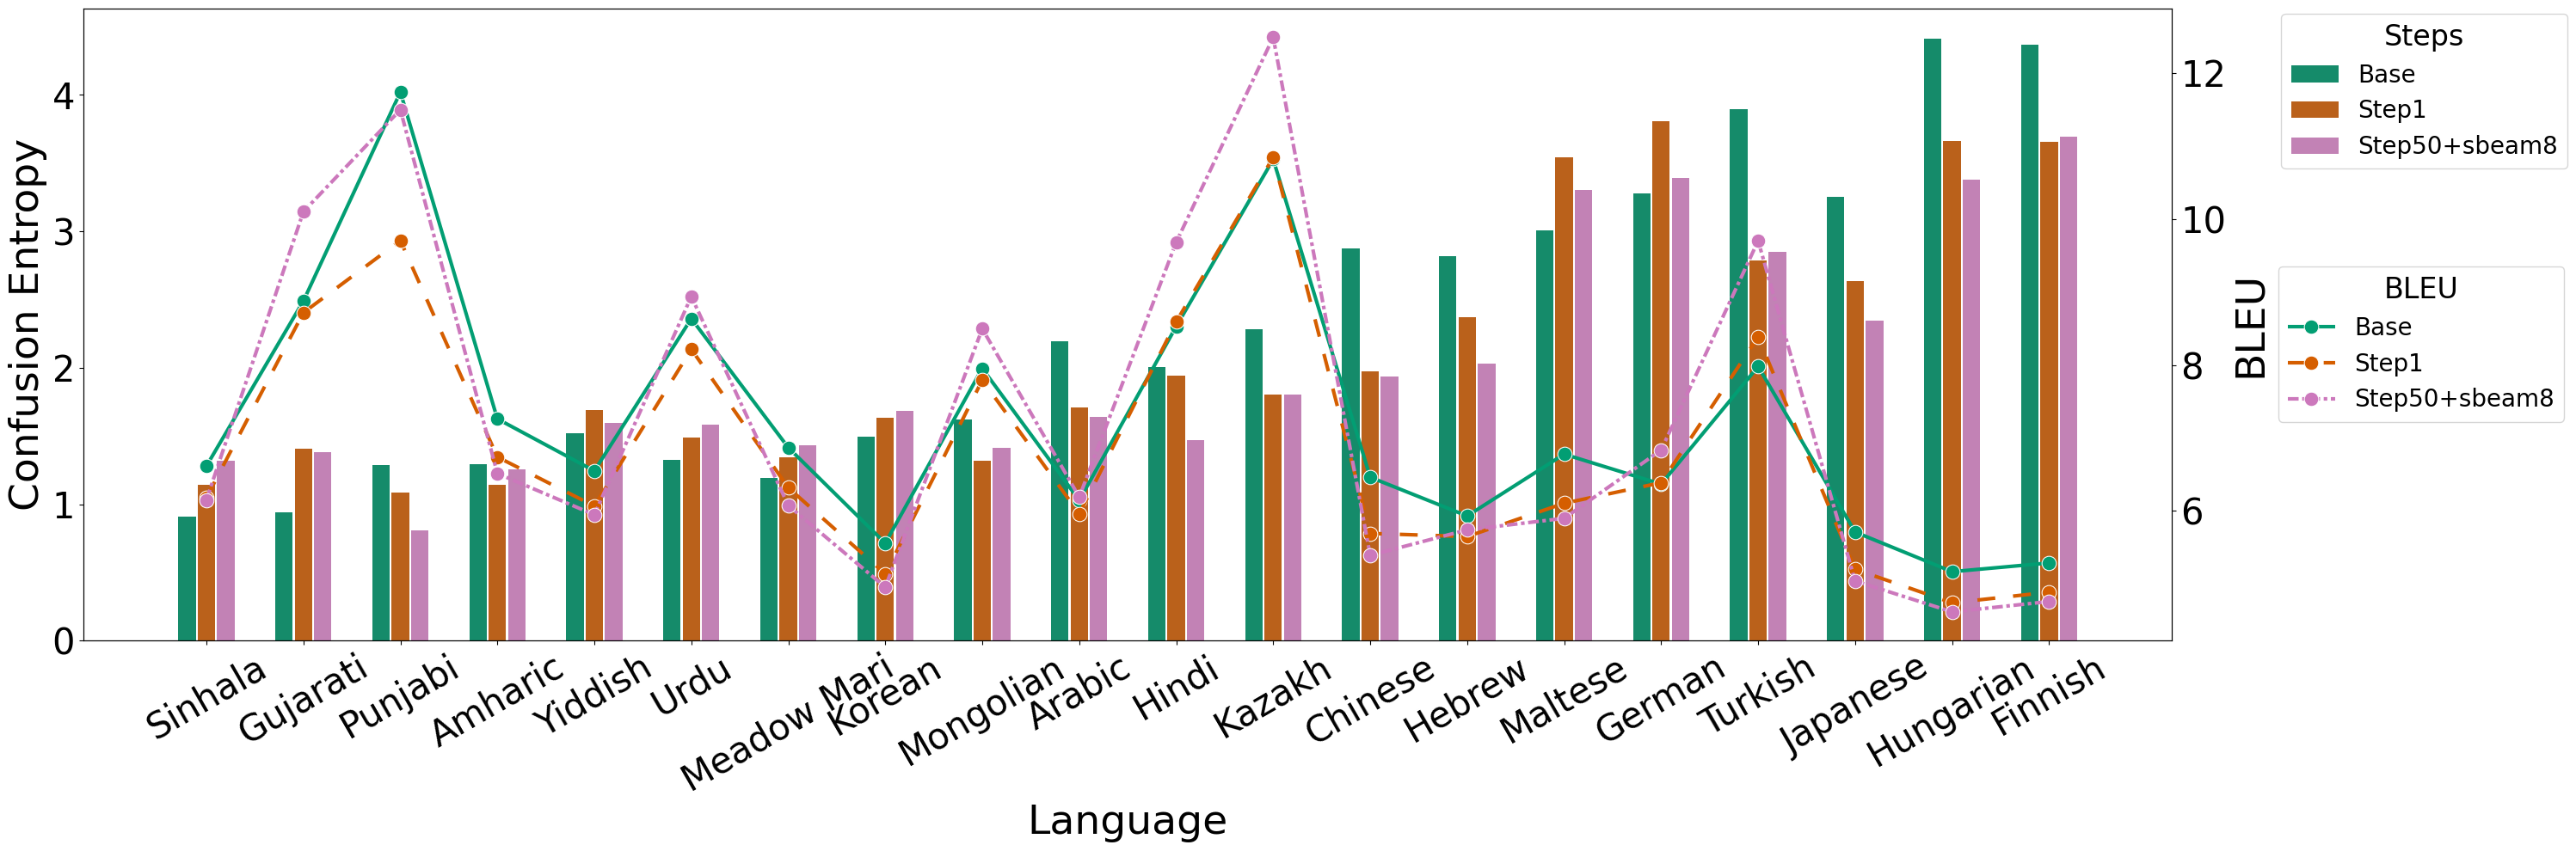

In [23]:
plot_lc_inversion(df_cross, "line_cross_reweighted-entropy", "language", "../results/inversion_language_confusion/eval_lang_confusion_cross_line.pdf", "eval", metric_name="BLEU", level="line")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451)]

In [22]:
def plot_lc_inversion(df, y_axis, x_axis, outputfile, lang, metric_name, level="line"):

    # Create the figure and the first axis (for entropy)
    fig, ax1 = plt.subplots(figsize=(30, 10))
    palette = sns.color_palette("colorblind", 6)
    colors=[palette[2], palette[3], palette[4]]

    if lang=="train":
        p = sns.barplot(x=x_axis, y=y_axis, data=df,width=0.6, hue="step",gap=0.1, palette=colors,  ax=ax1)
    else:
        p = sns.barplot(x=x_axis, y=y_axis, data=df, width=0.6,hue="step", gap=0.1, palette=colors, ax=ax1)

    # Customize the first y-axis (for entropy)

    ax1.set_ylabel("Confusion Entropy", fontsize=34)
    ax1.set_xlabel('Language', fontsize=34)
    ax1.tick_params(axis='y', labelsize=30)
    ax1.tick_params(axis='x', labelsize=30)
    plt.xticks(rotation=30)

    # inversion performance
    ax2 = ax1.twinx()  # This creates the second y-axis sharing the same x-axis

    dashes = [(1, 0), (5, 5), (3, 1, 1, 1)]  # solid, dashed, dotted

    if lang == "train":
        sns.lineplot(x=x_axis, y="inversion_avg", data=df, hue="step",
                     marker="o", linewidth=3, markersize=12, palette=colors, ax=ax2, style="step",
                     dashes=dashes)
    else:
        sns.lineplot(x=x_axis, y="inversion_avg", data=df, hue="step",
                     marker="o", linewidth=3, markersize=12, palette=colors, ax=ax2,  style="step", 
                     dashes=dashes)

    ax2.set_ylabel("BLEU", fontsize=34)
    ax2.tick_params(axis='y', labelsize=30)

    # Add the legend for the steps (can be adjusted for both y-axes)
    ax1.legend(title="Steps", fontsize=20, title_fontsize=24, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.2)
    # if lang == "eval":
    ax2.legend(title="BLEU", fontsize=20, title_fontsize=24, loc='upper right', bbox_to_anchor=(1.19, 0.6), borderaxespad=0.2)

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(outputfile, format='pdf', bbox_inches='tight')


# Language Confusion with Inversion at Train data

In [24]:

df_line_cross_train = pd.read_csv("../results/inversion_language_confusion/line_level/dataframes/multi_line_crosslingual_weighted_entropy_bleu_score_for_train.csv", index_col=0)
df_line_mono_train = pd.read_csv("../results/inversion_language_confusion/line_level/dataframes/multi_line_monolingual_weighted_entropy_bleu_score_for_train.csv", index_col=0)
df_word_cross_train = pd.read_csv("../results/inversion_language_confusion/word_level/dataframes/multi_word_crosslingual_weighted_entropy_bleu_score_for_train.csv", index_col=0)
df_word_mono_train = pd.read_csv("../results/inversion_language_confusion/word_level/dataframes/multi_word_monolingual_weighted_entropy_bleu_score_for_train.csv", index_col=0)

In [25]:
df_line_cross_train.rename(columns={"entropy":"line_cross_reweighted-entropy"}, inplace=True)
df_line_mono_train.rename(columns={"entropy":"line_mono_reweighted-entropy"}, inplace=True)
df_word_cross_train.rename(columns={"entropy":"word_cross_reweighted-entropy"}, inplace=True)
df_word_mono_train.rename(columns={"entropy":"word_mono_reweighted-entropy"}, inplace=True)

In [26]:
df_cross_train = df_word_cross_train.merge(df_line_cross_train, on=["language", "step", "lang", "inversion_avg", "mt5"])
df_mono_train= df_word_mono_train.merge(df_line_mono_train, on=["language", "step", "lang", "inversion_avg", "mt5"])
df_train = df_mono_train.merge(df_cross_train, on=["language", "step", "lang", "inversion_avg", "mt5"], how="outer")

In [27]:
df_line_cross_train

,lang,step,line_cross_reweighted-entropy,language,inversion_avg,mt5
0,pan,Base,0.304218,Punjabi,6.765988,0.37
1,heb,Base,0.340433,Hebrew,6.011234,1.06
2,guj,Base,0.727185,Gujarati,6.375913,0.43
3,cmn,Base,0.771132,Chinese,6.385944,1.67
4,deu,Base,0.803040,German,6.507209,3.05
...,...,...,...,...,...,...
88,guj_urd,Step50+sbeam8,3.261996,NaN,8.364390,NaN
89,hin_urd,Step50+sbeam8,3.255795,NaN,8.149298,NaN
90,arb_heb,Step50+sbeam8,3.027158,NaN,7.394766,NaN
91,guj_pan,Step50+sbeam8,2.785707,NaN,9.162810,NaN


In [28]:
groups_train =[]
for k, group in df_train.groupby("lang"):
    groups_train.append(group)

In [29]:
df_group_train = pd.concat(groups_train)

In [33]:
df_group_train["lang_name"]=df_group_train["lang"].map(iso2name)

In [32]:
ordered_languages

NameError: name 'ordered_languages' is not defined

In [290]:
df_group_train['lang_name'] = pd.Categorical(df_group_train['lang_name'], categories=ordered_languages, ordered=True)

In [291]:
df_group_train['step'] = pd.Categorical(df_group_train['step'], categories=["Base", "Step1","Step50+sbeam8"], ordered=True)

In [292]:
df_group_train = df_group_train.sort_values(["lang_name", "step"])

In [293]:
df_group_train.to_csv("../results/inversion_language_confusion/language_confusion_inversion_train_ordered.csv", index=False)

In [35]:
df_train = pd.read_csv("../results/inversion_language_confusion/inversion_lc_ordered_train.csv")

In [36]:
df_train = df_train[df_train["lang"]!="kaz_urd"]

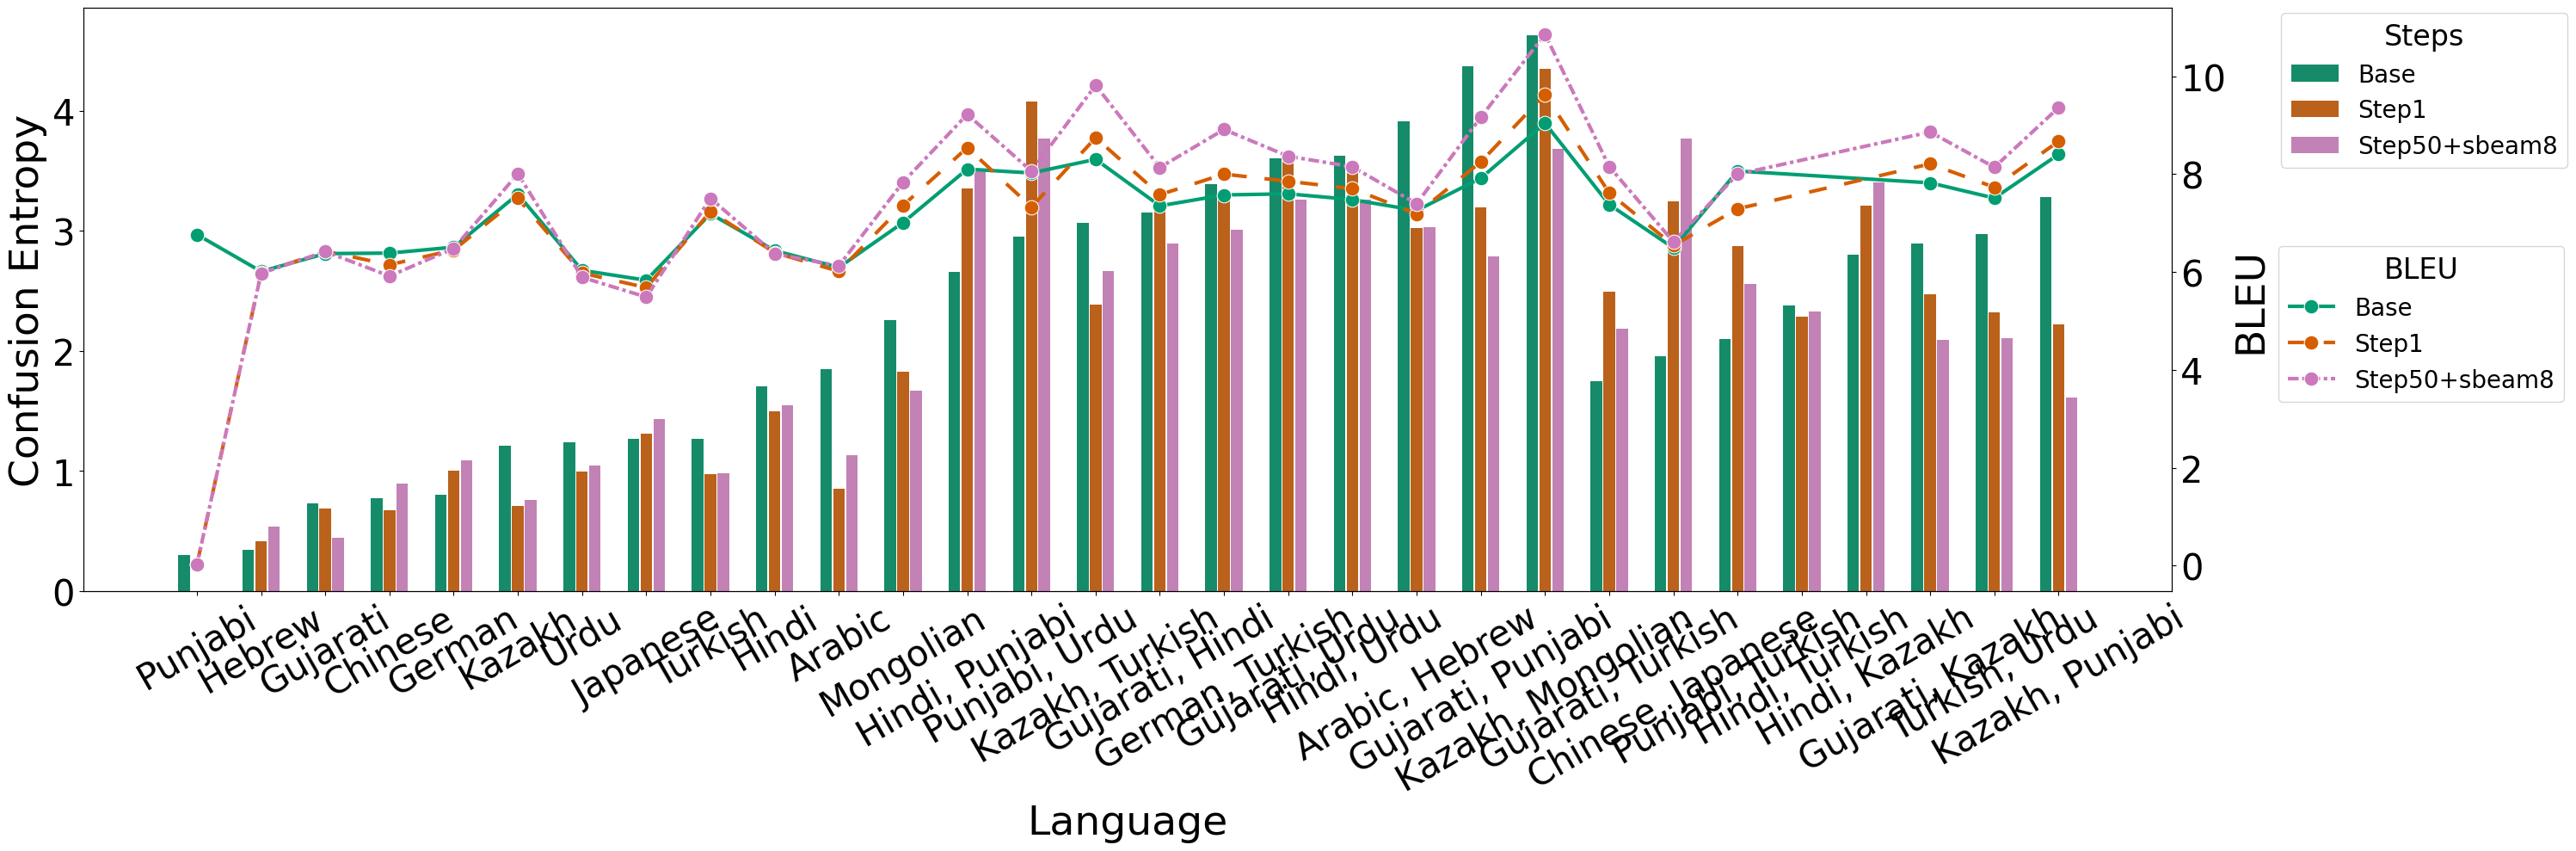

In [37]:
plot_lc_inversion(df_train, "line_cross_reweighted-entropy", "lang_name", 
                  "../results/inversion_language_confusion/line_crosslingual_inversion_language_confusion_for_train_0.pdf",
                  "train", metric_name="inversion_avg", level="line")

In [304]:
df_train["lang"].tolist()


['pan',
 'pan',
 'pan',
 'heb',
 'heb',
 'heb',
 'guj',
 'guj',
 'guj',
 'cmn',
 'cmn',
 'cmn',
 'deu',
 'deu',
 'deu',
 'kaz',
 'kaz',
 'kaz',
 'urd',
 'urd',
 'urd',
 'jpn',
 'jpn',
 'jpn',
 'tur',
 'tur',
 'tur',
 'hin',
 'hin',
 'hin',
 'arb',
 'arb',
 'arb',
 'mon',
 'mon',
 'mon',
 'hin_pan',
 'hin_pan',
 'hin_pan',
 'pan_urd',
 'pan_urd',
 'pan_urd',
 'kaz_tur',
 'kaz_tur',
 'kaz_tur',
 'guj_hin',
 'guj_hin',
 'guj_hin',
 'deu_tur',
 'deu_tur',
 'deu_tur',
 'guj_urd',
 'guj_urd',
 'guj_urd',
 'hin_urd',
 'hin_urd',
 'hin_urd',
 'arb_heb',
 'arb_heb',
 'arb_heb',
 'guj_pan',
 'guj_pan',
 'guj_pan',
 'kaz_mon',
 'kaz_mon',
 'kaz_mon',
 'guj_tur',
 'guj_tur',
 'guj_tur',
 'cmn_jpn',
 'cmn_jpn',
 'cmn_jpn',
 'pan_tur',
 'pan_tur',
 'pan_tur',
 'hin_tur',
 'hin_tur',
 'hin_tur',
 'hin_kaz',
 'hin_kaz',
 'hin_kaz',
 'guj_kaz',
 'guj_kaz',
 'guj_kaz',
 'tur_urd',
 'tur_urd',
 'tur_urd',
 'kaz_pan',
 'kaz_pan',
 'kaz_pan']

In [197]:
df_train_ordered = pd.read_csv("../results/inversion_language_confusion/language_confusion_inversion_train_ordered.csv")

In [179]:
lang2lang_dict = {}
for l, lang in zip(df_train["lang"],df_train["language"]):
    if lang is not np.nan:
        lang2lang_dict[l]=lang

In [210]:
ordered_languages = [x for x in df_train_ordered["language"].to_list() if len(str(x))>3]

In [182]:
df_train["lang_name"]=df_train["lang"].map(lang2lang_dict)

In [225]:
df_train_ordered["language"].tolist()

['Punjabi',
 nan,
 nan,
 'Hebrew',
 nan,
 nan,
 'Gujarati',
 nan,
 nan,
 'Chinese',
 nan,
 nan,
 'German',
 nan,
 nan,
 'Kazakh',
 nan,
 nan,
 'Urdu',
 nan,
 nan,
 'Japanese',
 nan,
 nan,
 'Turkish',
 nan,
 nan,
 'Hindi',
 nan,
 nan,
 'Arabic',
 nan,
 nan,
 'Mongolian',
 nan,
 nan,
 'Gujarati, Turkish',
 nan,
 nan,
 'Chinese, Japanese',
 nan,
 nan,
 'Punjabi, Turkish',
 nan,
 nan,
 'Hindi, Turkish',
 nan,
 nan,
 'Hindi, Kazakh',
 nan,
 nan,
 'Gujarati, Kazakh',
 nan,
 nan,
 'Turkish, Urdu',
 nan,
 nan,
 'Kazakh, Urdu',
 nan,
 nan,
 'Kazakh, Punjabi',
 nan,
 nan,
 'Hindi, Punjabi',
 nan,
 nan,
 'Punjabi, Urdu',
 nan,
 nan,
 'Kazakh, Turkish',
 nan,
 nan,
 'Gujarati, Hindi',
 nan,
 nan,
 'German, Turkish',
 nan,
 nan,
 'Gujarati, Urdu',
 nan,
 nan,
 'Hindi, Urdu',
 nan,
 nan,
 'Arabic, Hebrew',
 nan,
 nan,
 'Gujarati, Punjabi',
 nan,
 nan,
 'Kazakh, Mongolian',
 nan,
 nan]